# Projeto Machine Learning 1

**Objetivo**: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano.

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Adult)

###### Baixando as bibliotecas a serem utilizadas

In [681]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import simplefilter
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

##### Lendo o conjunto de dados

In [777]:
df = pd.read_csv('adult.data')

## Conhecendo a Base de Dados

In [904]:
# Lendo as 5 primeiras linhas do dataset
df.head()

,educational-num,hours-per-week,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,workclass_Federal-gov,...,age_adult,age_old,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,capital
0,-1.197259,-0.034087,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.132642
1,-0.419335,0.772930,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,-0.132642
2,0.747550,-0.034087,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,-0.132642
3,-0.030373,-0.034087,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0.895787
4,-0.030373,-0.841104,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,-0.132642


In [779]:
# Verificando o total de entradas
df.count()

age                48842
workclass          48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
sex                48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

## Colunas do Dataset

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

# Análise Exploratória

Esse é o momento em que fazemos uma análise exploratória na base de dados com a finalidade responder as seguintes questões:

* **a)** Visualização da distribuição das classes (variável income).
* **b)** Visualização da distribuição das classes por Nível de Escolaridade.
* **c)** Visualização da relação (scatter) das colunas age,sex e race com a coluna income.


In [780]:
# Visualização da distribuição da variável income
df.income

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [905]:
#df.groupby('income')['education'].value_counts()

##### Gráfico que relaciona a renda com o nível de escolaridade

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

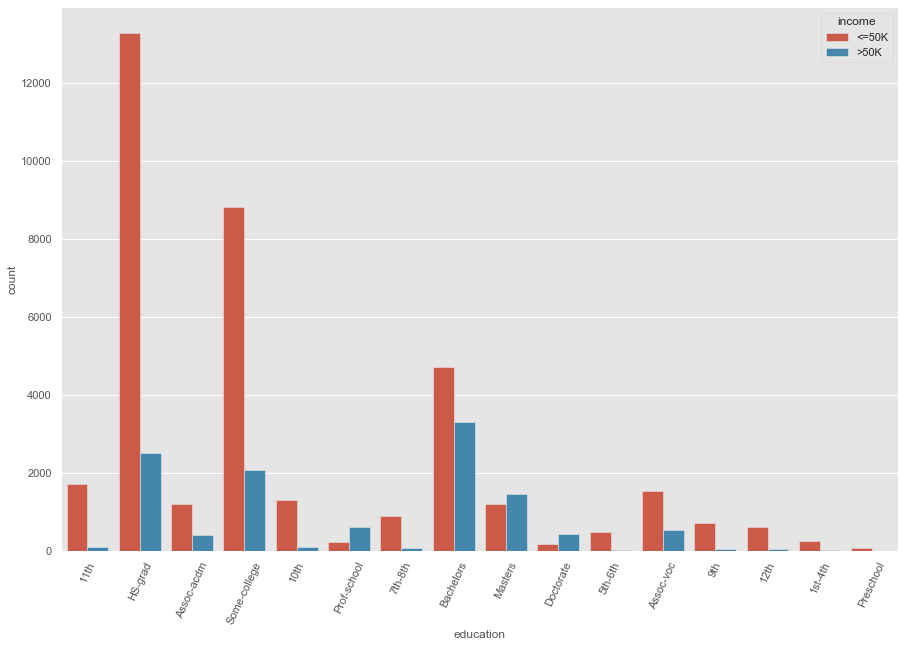

In [782]:
# Distribuição das classes por Nível de Escolaridade
plt.figure(figsize=(15,10))
sns.countplot(data=df, x = 'education',  hue = 'income')
plt.xticks(rotation=65)

##### Relação entre Sexo, Raça, Idade e Renda

* **Gráfico que relaciona Sexo e Renda**

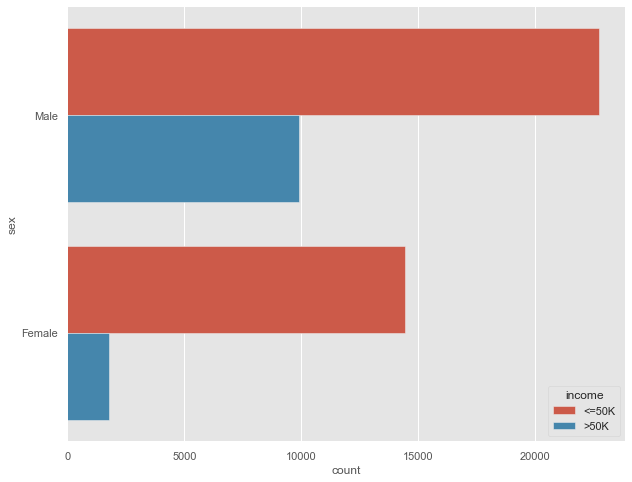

In [783]:
# Grafico que relaciona Sexo e Renda
plt.figure(figsize=(10,8))
sns.countplot(y="sex", hue='income', data=df)

* **Gráfico que relaciona Raça e Renda**

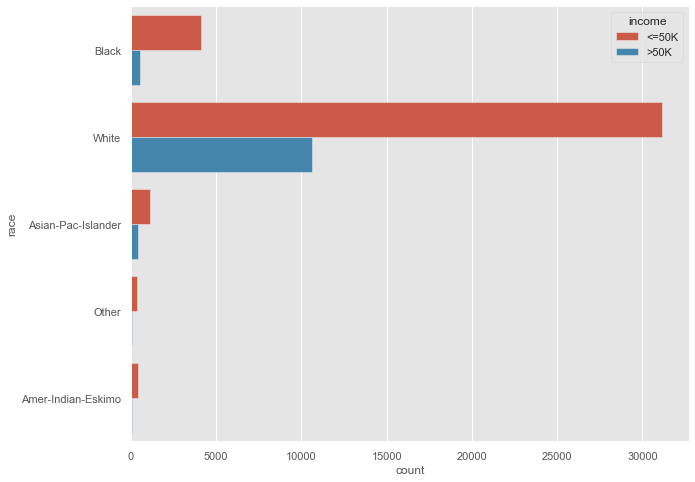

In [784]:
# Gráfico que relaciona raça com renda
plt.figure(figsize=(10,8))
sns.countplot(y = 'race', hue = 'income', data = df)

* **Gráfico que relaciona Idade e Renda**

In [785]:
# Verificando idade minima e maxima
print(f'A idade mínima é de: {df.age.min()} anos')
print(f'A idade máxima é de: {df.age.max()} anos')

A idade mínima é de: 17 anos
A idade máxima é de: 90 anos


In [786]:
# Para melhor visualização gráfica
# Se fez necessário o particionamento da coluna dados em tres sub colunas.
df.age = pd.cut(df.age, [0,30,60,90], labels = ['young', 'adult', 'old'])

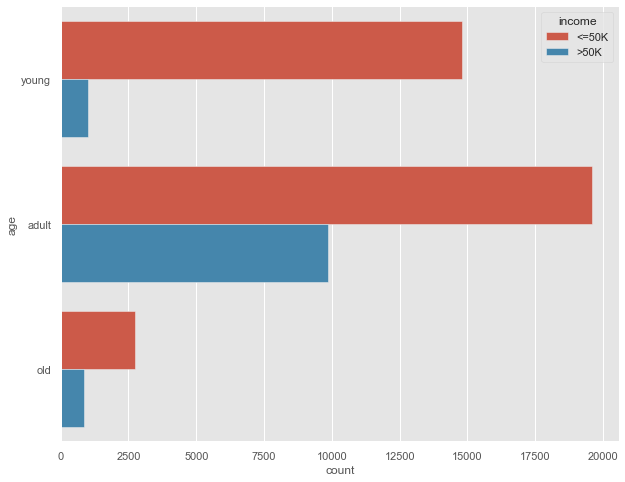

In [787]:
# Gráfico da relação entre idade e renda
plt.figure(figsize = (10,8))
sns.countplot(y='age', hue = 'income', data = df)

### Verificação dos dados

####  <span style="color:Blue">  Verificação e Análise de Dados </span>
**Análise e pre-processamento nos dados:**

* **a)** Verificar se existem dados missing.
* **b)** Converter colunas categóricas para numéricas usando **OneHotEnconder**.
* **c)** Explicar qual técnica de conversão você usou e por quê.

In [788]:
# Verificando dados missing
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

###### Tratando a coluna workclass

In [789]:
# o dataset não possui entradas nulas
# No entanto, há muitas entradas com o valor '?'
# Por conta disso vamos precisar fazer algumas auterações

In [790]:
# Agrupando as colunas workclass e income
df.groupby('income')['workclass'].value_counts()

income  workclass       
<=50K   Private             26519
        Self-emp-not-inc     2785
        ?                    2534
        Local-gov            2209
        State-gov            1451
        Federal-gov           871
        Self-emp-inc          757
        Without-pay            19
        Never-worked           10
>50K    Private              7387
        Self-emp-not-inc     1077
        Self-emp-inc          938
        Local-gov             927
        Federal-gov           561
        State-gov             530
        ?                     265
        Without-pay             2
Name: workclass, dtype: int64

In [791]:
# Modificando todos as entradas do tipo "?" para undefined
def rename_work(row):
    if row == '?':
        return 'undefined'
    else:
        return row
df.workclass = df.workclass.apply(rename_work)

In [792]:
# Balanceando os dados de modo que a parcela das '?' que estao relacionadas com a renda >50K
# Receberá o nome de Without-pay
# Balanceando os dados de modo que a parcela das '?' que estao relacionadas com a renda <=50K
# Receberá o nome de Private
df['workclass'].loc[(df['workclass'] == 'undefined') & (df['income'] == '>50K')] = 'Without-pay' 
df['workclass'].loc[(df['workclass'] == 'undefined') & (df['income'] == '<=50K')]= 'Private'

C:\Users\dougb\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [793]:
# Agrupando novamente income e workclass e notando que a entrada '?' foi encorporada 
df.groupby('income')['workclass'].value_counts()

income  workclass       
<=50K   Private             29053
        Self-emp-not-inc     2785
        Local-gov            2209
        State-gov            1451
        Federal-gov           871
        Self-emp-inc          757
        Without-pay            19
        Never-worked           10
>50K    Private              7387
        Self-emp-not-inc     1077
        Self-emp-inc          938
        Local-gov             927
        Federal-gov           561
        State-gov             530
        Without-pay           267
Name: workclass, dtype: int64

###### Tratando a coluna occupation

In [794]:
# Agrupando income e occupation
df.groupby('income')['occupation'].value_counts()

income  occupation       
<=50K   Adm-clerical         4843
        Craft-repair         4729
        Other-service        4719
        Sales                4029
        Prof-specialty       3388
        Exec-managerial      3178
        Machine-op-inspct    2650
        ?                    2544
        Handlers-cleaners    1934
        Transport-moving     1874
        Farming-fishing      1317
        Tech-support         1026
        Protective-serv       675
        Priv-house-serv       239
        Armed-Forces           10
>50K    Exec-managerial      2908
        Prof-specialty       2784
        Sales                1475
        Craft-repair         1383
        Adm-clerical          768
        Transport-moving      481
        Tech-support          420
        Machine-op-inspct     372
        Protective-serv       308
        ?                     265
        Other-service         204
        Farming-fishing       173
        Handlers-cleaners     138
        Armed-Forces  

In [795]:
# Renomendo as '?'
def rename_occup(row):
    if row == '?':
        return 'undefined'
    else:
        return row
df.occupation = df.occupation.apply(rename_occup)

In [796]:
# Encorporando as entradas '?'
df['occupation'].loc[(df['occupation'] =='undefined') & (df['income']=='>50K')] = 'Exec-managerial'
df['occupation'].loc[(df['occupation'] == 'undefined') & (df['income']=='<=50K')] = 'Adm-clerical'

In [797]:
# Checando as mudanças realizadas
df.groupby('income')['occupation'].value_counts()

income  occupation       
<=50K   Adm-clerical         7387
        Craft-repair         4729
        Other-service        4719
        Sales                4029
        Prof-specialty       3388
        Exec-managerial      3178
        Machine-op-inspct    2650
        Handlers-cleaners    1934
        Transport-moving     1874
        Farming-fishing      1317
        Tech-support         1026
        Protective-serv       675
        Priv-house-serv       239
        Armed-Forces           10
>50K    Exec-managerial      3173
        Prof-specialty       2784
        Sales                1475
        Craft-repair         1383
        Adm-clerical          768
        Transport-moving      481
        Tech-support          420
        Machine-op-inspct     372
        Protective-serv       308
        Other-service         204
        Farming-fishing       173
        Handlers-cleaners     138
        Armed-Forces            5
        Priv-house-serv         3
Name: occupation, dtyp

###### Transformando dados categóricos em numéricos

In [799]:
# Transformando colunas categóricas em numéricas
num = ['sex', 'race', 'workclass', 'occupation', 'age', 'marital-status']

for x in num:
    df = pd.get_dummies(df, columns = [x], prefix = [x])



**EXPLIÇÃO...**

 A escolha pelo get_dummies se deu, pois essa técnica tem o ponto positivo de não criar no modelo
 
 a falsa sensação de ordem que o LabelEncoder as vezes pode gerar.

## <span style="color:Blue">  Pré-processamento de Dados </span>

Fazer um pré-processamento nos dados antes de aplicar os algoritmos de Machine learning.

* Aplicar algum padronizador ou normalizador nos dados numéricos.




**Criando nova coluna**
* Vamos crias uma nova coluna que sera a difença entre o capital recebido e o gasto.
* Após a criação podemos excluir as colunas que lhe deram origem.

In [801]:
# Criando uma nova coluna com a renda final.
df['capital'] = df['capital-gain'] - df['capital-loss']

In [803]:
# Excluindo algumas colunas ...
apagar = ['education', 'capital-gain', 'capital-loss', 'relationship', 'native-country']

for x in apagar:
    df.drop(columns = [x], inplace = True)

**Normalizando as colunas numéricas**

In [804]:
# Normalizando ....
lista = ['hours-per-week', 'capital', 'educational-num']

for x in lista:
    scaler = preprocessing.StandardScaler().fit(df[[x]])
    df[x] = scaler.transform(df[[x]])
    
    
    

##  <span style="color:Blue">  Classificação e Avaliação de Modelos </span>

Treinar pelo menos dois algoritmos supervisionados voltados para tarefas de classificação.

* **a)** Avaliar os modelos separando os dados de **treino** e **teste**.
* **b)** Avaliar os modelos usando **Cross Validation** 
* **c)** Explicar a diferença entre cada uma das abordagens acima com suas vantagens e desvantagens.
* **d)** Imprimir os resultados para cada modelo e abordagem de avaliação utilizando as métricas **Precisão**, **Recall** e **F1 Score**.


### Separando dados de treino e de teste

In [806]:
classe = df['income']
treino = df.drop('income', axis = 1, inplace = True)

In [816]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, classe ,test_size=0.3)

### Instanciando o modelo

In [817]:
knn = KNeighborsClassifier(n_neighbors=3)

### Treinando o modelo

In [818]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Executando o modelo

In [820]:
resultado = knn.predict(X_test)

In [821]:
resultado

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

### Cross Validation

In [822]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, df, classe, cv=5)
scores

array([0.83068891, 0.82362575, 0.82463145, 0.83015971, 0.83548321])

In [824]:

print(metrics.classification_report(y_test, resultado, target_names = classe.unique()))

              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89     11114
        >50K       0.66      0.61      0.63      3539

    accuracy                           0.83     14653
   macro avg       0.77      0.75      0.76     14653
weighted avg       0.83      0.83      0.83     14653



### Definindo a função Acurácia

In [834]:
def Acuracia(knn,X,y):
    resultados = cross_val_predict(knn, X, y)
    return metrics.accuracy_score(y,resultados)

In [835]:
Acuracia(knn, df, classe)

0.8289177347364973

### Instanciando o modelo - random forest

In [825]:
random_clf = RandomForestClassifier(random_state=0)

###  Treinando o modelo random forest

In [827]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Executando o modelo 

In [828]:
resultado = random_clf.predict(X_test)
resultado

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

### Cross validation

In [829]:
#from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_clf, df, classe)
scores

array([0.84829563, 0.85259494, 0.85534398, 0.85657248, 0.86066749])

### Validando o modelo

In [830]:
print(metrics.classification_report(y_test, resultado, target_names = classe.unique()))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     11114
        >50K       0.74      0.63      0.68      3539

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.79     14653
weighted avg       0.85      0.86      0.85     14653



In [831]:
# Testando a acurácia do modelo
def Acuracia(random_clf,X,y):
    resultados = cross_val_predict(random_clf, X, y)
    return metrics.accuracy_score(y,resultados)

In [833]:
Acuracia(random_clf,df,classe)

0.8546947299455386

##  <span style="color:Blue"> Tunning do Modelo </span>

Fazer um Tunning dos modelos e verificar o melhor resultado.

* Defina os melhores Hyperparametros para os algoritmos utilizando o GridSearch.
* Implemente usando Pipelines.
* Avalie os modelos usando **Cross Validation** (Utilize o recuso já integrado ao Pipeline).


### Criando Pipelines

In [882]:
# Criando vários Pipelines
pip_1 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=3))
])
# Pipeline com o pré-processador  MinMaxScaler:
pip_minmax = Pipeline([      
    ('min_max_scaler', MinMaxScaler()),
    ('clf',RandomForestClassifier(max_depth = 5))
])
# Pipeline com o pré-processador  MinMaxScaler e definindo um parâmetro para o modelo:
pip_max_depth = Pipeline([              
    ('min_max_scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(max_depth=3))
])
# Pipeline com o pré-processador  StandardScaler e definindo um parâmetro para o modelo:
pip_max_depth_std = Pipeline([              
    ('standardscaler', StandardScaler()),
    ('clf', RandomForestClassifier(max_depth=3))
])


In [880]:
pip_1.fit(X_train,y_train)
acuracia1 = pip_1.score(X_test, y_test)
acuracia1

0.8283627926021975

In [883]:
pip_minmax.fit(X_train,y_train)
acuracia2 = pip_minmax.score(X_test, y_test)
acuracia2

0.8467208080256603

In [849]:
pip_max_depth.fit(X_train,y_train)
acuracia3 = pip_max_depth.score(X_test, y_test)
acuracia3


0.8115061762096499

In [850]:
pip_max_depth_std.fit(X_train,y_train)
acuracia4 = pip_max_depth_std.score(X_test, y_test)
acuracia4

0.8061147887804545

### GridSearch 

In [888]:
pip_final = Pipeline([      
    ('min_max_scaler', MinMaxScaler()),
    ('clf',RandomForestClassifier())
])

In [889]:
pip_final.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('min_max_scaler',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [890]:
pip_final.predict(X_test)

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [897]:
# Parâmetros para fazer o grid
parametros_grid = dict(clf__max_depth=[3,4,5,6,7,8,9,10])

# Cria objeto gridsearch com os parâmetros definidos e a configuração de validação cruzada com 5 folds
grid = GridSearchCV(pip_final, param_grid=parametros_grid, cv=5, scoring='accuracy')

In [896]:
sorted(pip_final.get_params().keys())

['clf',
 'clf__bootstrap',
 'clf__ccp_alpha',
 'clf__class_weight',
 'clf__criterion',
 'clf__max_depth',
 'clf__max_features',
 'clf__max_leaf_nodes',
 'clf__max_samples',
 'clf__min_impurity_decrease',
 'clf__min_impurity_split',
 'clf__min_samples_leaf',
 'clf__min_samples_split',
 'clf__min_weight_fraction_leaf',
 'clf__n_estimators',
 'clf__n_jobs',
 'clf__oob_score',
 'clf__random_state',
 'clf__verbose',
 'clf__warm_start',
 'memory',
 'min_max_scaler',
 'min_max_scaler__copy',
 'min_max_scaler__feature_range',
 'steps',
 'verbose']

In [898]:
#Executa o GridSearch
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('min_max_scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                         

In [899]:
grid.cv_results_

{'mean_fit_time': array([0.87278013, 0.94844708, 1.18143053, 1.36007476, 1.41104736,
        1.51104798, 1.57646861, 1.68241949]),
 'std_fit_time': array([0.08363242, 0.01705805, 0.08536686, 0.08721826, 0.10666086,
        0.05383711, 0.03450358, 0.01166947]),
 'mean_score_time': array([0.09093165, 0.09254379, 1.67013631, 0.10994568, 0.09754705,
        0.10735483, 0.11314673, 0.12234554]),
 'std_score_time': array([3.04418860e-02, 2.66607337e-02, 3.15688266e+00, 1.34450602e-02,
        1.20693595e-03, 3.81567428e-03, 7.40199090e-04, 2.79742865e-03]),
 'param_clf__max_depth': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 3},
  {'clf__max_depth': 4},
  {'clf__max_depth': 5},
  {'clf__max_depth': 6},
  {'clf__max_depth': 7},
  {'clf__max_depth': 8},
  {'clf__max_depth': 9},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.

In [900]:
grid.best_params_

{'clf__max_depth': 10}

In [902]:
grid.best_score_

0.8615928855701153